**Multi-Model Traffic Safety: Sign Classification and Distracted Driver Detection**

**Team Members**:



Rohan Saraswat, Prn-21070126071, AIML-B1.

Saksham Jain, Prn- 21070126075, AIML-B1.


**Project Description:**

Our project focuses on enhancing road safety through advanced deep learning techniques. Initially, we developed a Convolutional Neural Network (CNN) model capable of accurately classifying traffic signs across 43 different categories. In parallel, we trained a separate model for detecting distracted drivers, classifying them into 10 distinct categories based on their behavior.

Following the training phase, we conducted extensive prediction evaluations to ensure the models' efficacy in real-world scenarios. To further optimize performance, we implemented Bayesian optimization techniques to fine-tune the hyperparameters of specific models, ensuring they operate at peak efficiency.

By combining these elements, our project aims to contribute to the creation of a safer and more efficient traffic management system, ultimately benefiting both drivers and pedestrians alike.


**Traffic Sign Classification Model Building:**

Importing Neccessary Libraries:

In [ ]:
import tensorflow_addons as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.utils import to_categorical
import os
from tqdm import tqdm
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape, Activation, Dot
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization, LayerNormalization, Normalization
# from keras.preprocessing.image import ImageDataGenerat

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import os
import pylab

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

Importing The Dataset:

In [ ]:
data1 = tf.keras.utils.image_dataset_from_directory('/kaggle/input/gtsrb-german-traffic-sign/Train')


Found 39209 files belonging to 43 classes.


In [ ]:
data_iterator1 = data1.as_numpy_iterator()

In [ ]:
batch1 = data_iterator1.next()

Ploting Sample Images

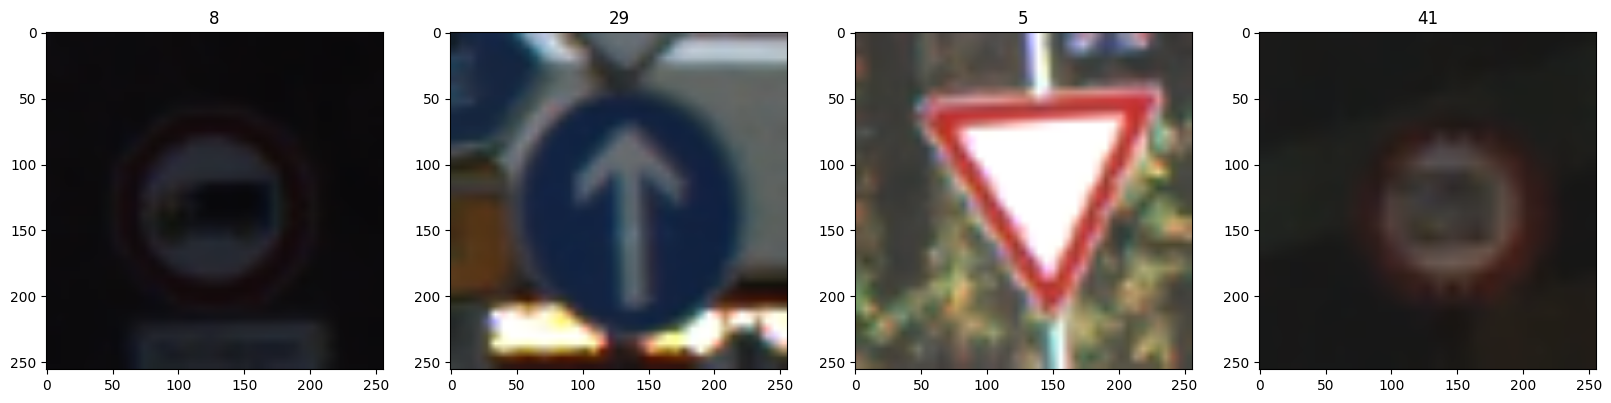

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch1[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch1[1][idx])

Maping The Dataset

In [ ]:
data1= data1.map(lambda x1,y1: (x1/255, y1))

Spliting The Data:

In [ ]:
train_size1 = int(len(data1)*.7)
val_size1 = int(len(data1)*.2)
test_size1 = int(len(data1)*.1)

In [ ]:
# Taking neccessary values:
train1 = data1.take(train_size1)
val1 = data1.skip(train_size1).take(val_size1)
test1 = data1.skip(train_size1+val_size1).take(test_size1)

In [ ]:
print(train1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


CNN-Model Building:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
model1= Sequential()

Model-1 Architecture:

In [ ]:
# Architecture for model1 for traffic detection:
model1.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model1.add(MaxPooling2D())
model1.add(Conv2D(32, (3,3), 1, activation='relu'))
model1.add(MaxPooling2D())
model1.add(Conv2D(16, (3,3), 1, activation='relu'))
model1.add(MaxPooling2D())

model1.add(Flatten())
model1.add(Dense(256, activation='relu'))

# Adjusting the number of units in the output layer to match your number of classes
num_classes = 43
model1.add(Dense(num_classes, activation='softmax'))  # Use softmax for multiclass classification

# Compiling the model
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  #
              metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
logdir='logs'
tensorboard_callback1 = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# For Traffic Sign Detection:
hist1 = model1.fit(train1, epochs=10, validation_data=val1, callbacks=[tensorboard_callback1])

Epoch 1/10
858/858 [==============================] - 159s 172ms/step - loss: 0.8309 - accuracy: 0.7717 - val_loss: 0.2700 - val_accuracy: 0.9298
Epoch 2/10
858/858 [==============================] - 123s 143ms/step - loss: 0.1682 - accuracy: 0.9543 - val_loss: 0.2362 - val_accuracy: 0.9409
Epoch 3/10
858/858 [==============================] - 83s 97ms/step - loss: 0.0995 - accuracy: 0.9723 - val_loss: 0.2373 - val_accuracy: 0.9474
Epoch 4/10
858/858 [==============================] - 81s 94ms/step - loss: 0.0820 - accuracy: 0.9775 - val_loss: 0.1340 - val_accuracy: 0.9700
Epoch 5/10
858/858 [==============================] - 123s 143ms/step - loss: 0.0638 - accuracy: 0.9827 - val_loss: 0.1490 - val_accuracy: 0.9679
Epoch 6/10
858/858 [==============================] - 123s 143ms/step - loss: 0.0481 - accuracy: 0.9874 - val_loss: 0.1552 - val_accuracy: 0.9685
Epoch 7/10
858/858 [==============================] - 122s 142ms/step - loss: 0.0454 - accuracy: 0.9875 - val_loss: 0.1444 - val

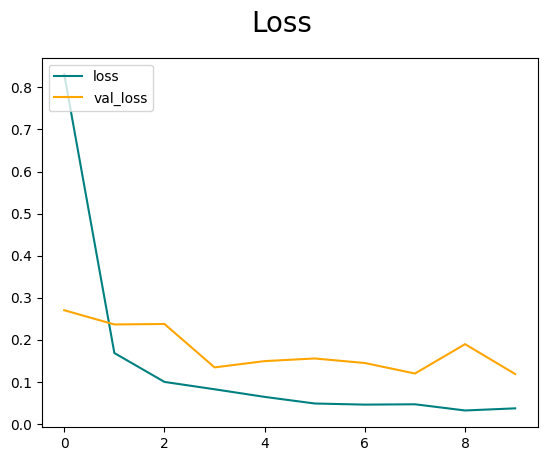

In [ ]:
# Loss and validation Loss Graph:
fig = plt.figure()
plt.plot(hist1.history['loss'], color='teal', label='loss')
plt.plot(hist1.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

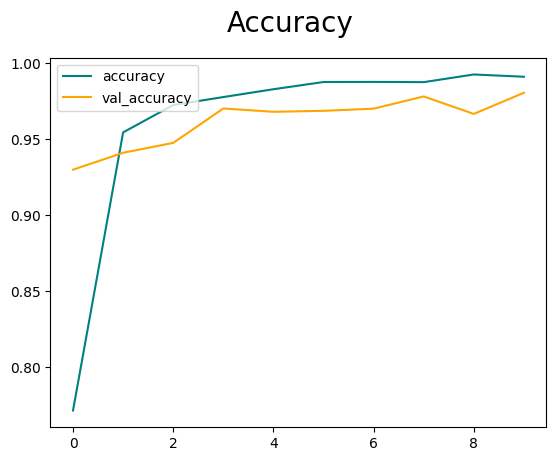

In [ ]:
# Accuracy and Validation accuracy Graph:
fig = plt.figure()
plt.plot(hist1.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist1.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Accuracy Testing:

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy


In [ ]:
pre1 = Precision()
re1 = Recall()
acc1 = CategoricalAccuracy()

In [ ]:
# Converting Into One-hot encoded format:
for batch in test1.as_numpy_iterator():
    X1, y1 = batch
    yhat1 = model1.predict(X1)
    y_one_hot1 = tf.one_hot(y1, depth=43)  # Converting labels to one-hot encoded format
    pre1.update_state(y_one_hot1, yhat1)
    re1.update_state(y_one_hot1, yhat1)
    acc1.update_state(y_one_hot1, yhat1)

1/1 [==============================] - 0s 31ms/step


In [ ]:
y_one_hot1 = tf.one_hot(y1, depth=43)

The Accuracy matrices Results:

In [ ]:
print(pre1.result(), re1.result(), acc1.result())

tf.Tensor(0.9802107, shape=(), dtype=float32) tf.Tensor(0.9769467, shape=(), dtype=float32) tf.Tensor(0.9990052, shape=(), dtype=float32)


In [ ]:
print("Precision :0.9802107 ")
print("Recall : 0.9769467 ")
print("Accuracy: 0.9990052")

Precision :0.9802107 
Recall : 0.9769467 
Accuracy: 0.9990052


**Distracted Driver Identification Model:**


Loading The Dataset:

In [ ]:

data2= tf.keras.utils.image_dataset_from_directory('/kaggle/input/state-farm-distracted-driver-detection/imgs/train')

Found 22424 files belonging to 10 classes.


In [ ]:
data_iterator2 = data2.as_numpy_iterator()

In [ ]:
batch2 = data_iterator2.next()

Sample Images Ploting:

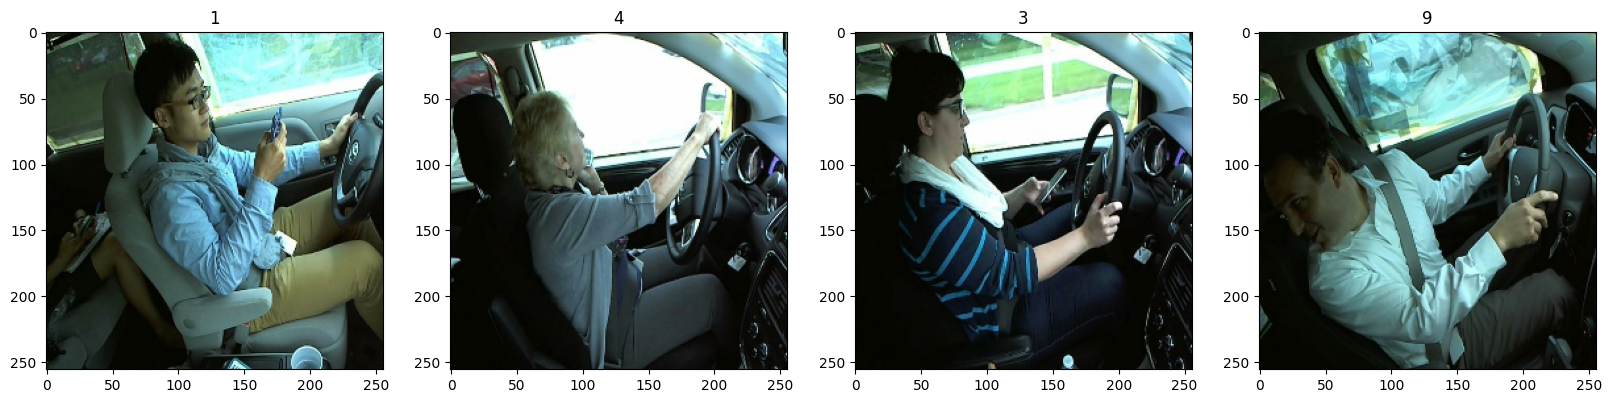

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch2[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch2[1][idx])

Data Mapping:

In [ ]:
data2 = data2.map(lambda x2,y2: (x2/255, y2))

Spliting The Dataset:

In [ ]:
train_size2 = int(len(data2)*.7)
val_size2 = int(len(data2)*.2)
test_size2 = int(len(data2)*.1)

In [ ]:
train2 = data2.take(train_size2)
val2 = data2.skip(train_size2).take(val_size2)
test2 = data2.skip(train_size2+val_size2).take(test_size2)

In [ ]:
print(train2)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


Model Building:

In [ ]:
# Model for Driver Distraction Classification:
model2= Sequential()
model2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model2.add(MaxPooling2D())
model2.add(Conv2D(32, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(16, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())

model2.add(Flatten())
model2.add(Dense(256, activation='relu'))

# Adjusting the number of units in the output layer to match our number of classes
num_classes = 10
model2.add(Dense(num_classes, activation='softmax'))  # Using softmax for multiclass classification

# Compile the model
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [ ]:
tensorboard_callback2 = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist2= model2.fit(train2, epochs=10, validation_data=val2, callbacks=[tensorboard_callback2])

Epoch 1/10
490/490 [==============================] - 329s 660ms/step - loss: 0.4481 - accuracy: 0.8577 - val_loss: 0.0893 - val_accuracy: 0.9734
Epoch 2/10
490/490 [==============================] - 85s 172ms/step - loss: 0.0442 - accuracy: 0.9860 - val_loss: 0.0513 - val_accuracy: 0.9868
Epoch 3/10
490/490 [==============================] - 123s 250ms/step - loss: 0.0261 - accuracy: 0.9931 - val_loss: 0.0476 - val_accuracy: 0.9897
Epoch 4/10
490/490 [==============================] - 129s 262ms/step - loss: 0.0165 - accuracy: 0.9948 - val_loss: 0.0821 - val_accuracy: 0.9848
Epoch 5/10
490/490 [==============================] - 125s 254ms/step - loss: 0.0134 - accuracy: 0.9963 - val_loss: 0.0490 - val_accuracy: 0.9864
Epoch 6/10
490/490 [==============================] - 124s 251ms/step - loss: 0.0093 - accuracy: 0.9972 - val_loss: 0.0327 - val_accuracy: 0.9931
Epoch 7/10
490/490 [==============================] - 129s 262ms/step - loss: 0.0059 - accuracy: 0.9985 - val_loss: 0.0322 - 

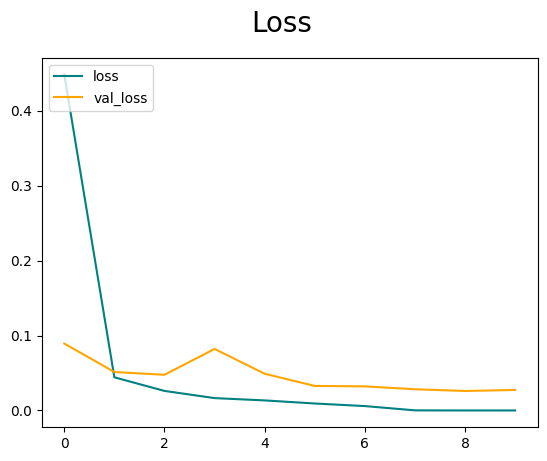

In [ ]:
# For Driver Detection:
# Plotting Validity Graph for Trafic Sign:
fig = plt.figure()
plt.plot(hist2.history['loss'], color='teal', label='loss')
plt.plot(hist2.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

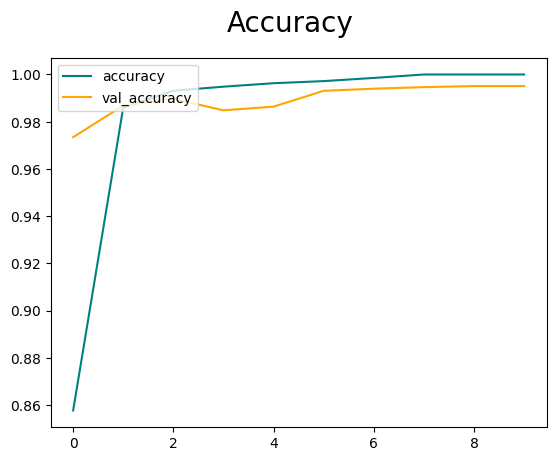

In [ ]:
# Graph between Accuracy and val-Accuracy:
fig = plt.figure()
plt.plot(hist2.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist2.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Results testing:

In [ ]:
pre2 = Precision()
re2 = Recall()
acc2 = CategoricalAccuracy()

In [ ]:
for batch in test2.as_numpy_iterator():
    X2, y2 = batch
    yhat2 = model2.predict(X2)
    y_one_hot2 = tf.one_hot(y2, depth=10)  # Converting labels to one-hot encoded format
    pre2.update_state(y_one_hot2, yhat2)
    re2.update_state(y_one_hot2, yhat2)
    acc2.update_state(y_one_hot2, yhat2)

1/1 [==============================] - 0s 32ms/step


In [ ]:
y_one_hot2 = tf.one_hot(y2, depth=10)

Accuracy Mertices:

In [ ]:
print(pre2.result(), re2.result(), acc2.result())

tf.Tensor(0.9941964, shape=(), dtype=float32) tf.Tensor(0.9941964, shape=(), dtype=float32) tf.Tensor(0.99883926, shape=(), dtype=float32)


In [ ]:
print("Precision :0.9941964")
print("Recall : 0.9941964 ")
print("Accuracy: 0.99883926")

Precision :0.9941964
Recall : 0.9941964 
Accuracy: 0.99883926


Model Prediction and Application Usecases:

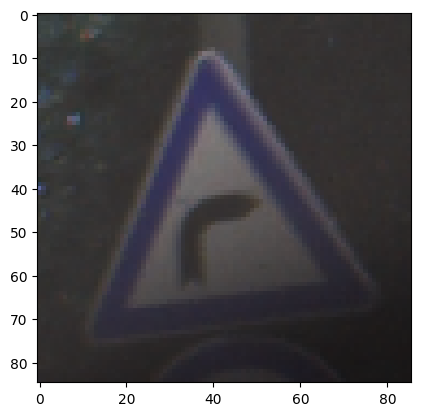

In [ ]:
# Prediction Time:
img1 = cv2.imread('/kaggle/input/gtsrb-german-traffic-sign/Test/00250.png')
plt.imshow(img1)
plt.show()

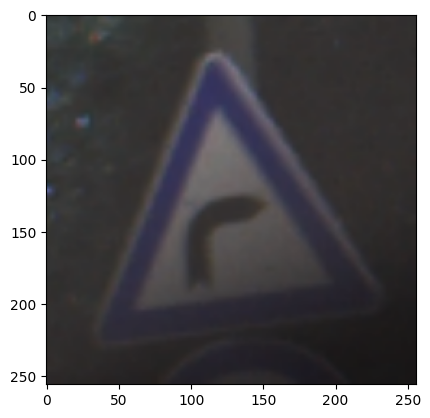

In [ ]:
resize = tf.image.resize(img1, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
prediction=model1.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 1s 531ms/step


In [ ]:
prediction

array([[2.18282370e-08, 6.15518414e-10, 2.61777659e-05, 6.03525477e-05,
        1.03103295e-04, 4.12735957e-11, 7.28925670e-11, 1.62852061e-07,
        3.35364202e-05, 6.54815224e-09, 2.43343762e-04, 4.47949387e-05,
        4.61073402e-09, 8.11018705e-01, 7.24488203e-09, 1.10260441e-06,
        9.88039002e-02, 9.97357856e-05, 3.79557139e-04, 3.06884103e-05,
        3.83875071e-04, 8.24469775e-02, 1.70134346e-03, 1.66492191e-05,
        8.90998635e-04, 2.72999614e-07, 1.14976010e-05, 4.83185659e-07,
        8.48790265e-08, 1.47629225e-06, 5.30560783e-07, 5.01099464e-07,
        6.72068836e-07, 1.20484970e-07, 4.78359482e-07, 2.79441269e-06,
        7.49859646e-06, 6.58429708e-05, 2.47030925e-06, 2.40608388e-05,
        1.28784263e-08, 7.89627030e-10, 3.59628815e-03]], dtype=float32)

Classes Labeling:

In [ ]:
# Assuming 'prediction' is the array you provided
# Get the index of the predicted class
predicted_class_index = np.argmax(prediction)

# Define the mapping dictionary
class_mapping = {
    0:'Speed limit (20km/h)',
    1:'Speed limit (30km/h)',
    2:'Speed limit (50km/h)',
    3:'Speed limit (60km/h)',
    4:'Speed limit (70km/h)',
    5:'Speed limit (80km/h)',
    6:'End of speed limit (80km/h)',
    7:'Speed limit (100km/h)',
    8:'Speed limit (120km/h)',
    9:'No passing',
    10:'No passing veh over 3.5 tons',
    11:'Right-of-way at intersection',
    12:'Priority road',
    13:'Yield',
    14:'Stop',
    15:'No vehicles',
    16:'Veh > 3.5 tons prohibited',
    17:'No entry',
    18:'General caution',
    19:'Dangerous curve left',
    20:'Dangerous curve right',
    21:'Double curve',
    22:'Bumpy road',
    23:'Slippery road',
    24:'Road narrows on the right',
    25:'Road work',
    26:'Traffic signals',
    27:'Pedestrians',
    28:'Children crossing',
    29:'Bicycles crossing',
    30:'Beware of ice/snow',
    31:'Wild animals crossing',
    32:'End speed + passing limits',
    33:'Turn right ahead',
    34:'Turn left ahead',
    35:'Ahead only',
    36:'Go straight or right',
    37:'Go straight or left',
    38:'Keep right',
    39:'Keep left',
    40:'Roundabout mandatory',
    41:'End of no passing',
    42:'End no passing veh > 3.5 tons'
}

# Get the corresponding label
predicted_label = class_mapping[predicted_class_index]
predicted_probability = prediction[0][predicted_class_index]

# Print the predicted label
print(predicted_label)
print(f'Predicted Probability: {predicted_probability}')


Yield
Predicted Probability: 0.811018705368042


In [ ]:
# Testing Drivers Detection:


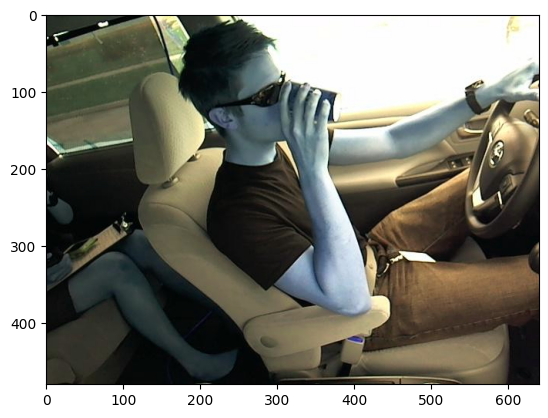

In [ ]:
img2 = cv2.imread('/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_100004.jpg')
plt.imshow(img2)
plt.show()

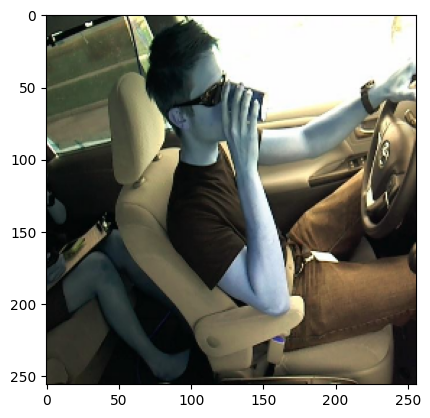

In [ ]:
resize2 = tf.image.resize(img2, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [ ]:
predictio2=model2.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 21ms/step


In [ ]:
predictio2

array([[0.01340847, 0.10247003, 0.10526796, 0.12600066, 0.08301789,
        0.02679964, 0.36562982, 0.07626881, 0.0507251 , 0.05041163]],
      dtype=float32)

Classes Labeling:

In [ ]:
# Assuming 'prediction' is the array you provided
# Get the index of the predicted class
predicted_class_index2 = np.argmax(predictio2)

# Defining the mapping dictionary
class_mapping = {
    0:'Focused_Driver',
    1:'Phone_Watching',
    2:'Talking_On_Phone',
    3:'Phone_In_Hand_Driving',
    4:'Talking_and_Drive',
    5:'Operating_Radio',
    6:'Drinking_Liquid',
    7:'Looking_Backward',
    8:'Taking_To_partner',
    9:'Talking'
}

# Geting the corresponding label
predicted_label2 = class_mapping[predicted_class_index2]
predicted_probability2 = prediction[0][predicted_class_index2]

# Printing the predicted label
print(predicted_label2)
print(f'Predicted Probability: {predicted_probability2}')


Drinking_Liquid
Predicted Probability: 7.289256698239654e-11


**Use Case Modeling:**

The below code defines a Python function named follow_traffic_sign that takes two predictions as input: traffic_sign_prediction and driver_prediction. It maps the predicted classes to their respective labels for traffic signs and driver focus states using predefined dictionaries. The function then prints a message based on the predictions.

If the predicted driver focus class indicates the driver is focused, it advises following the corresponding traffic sign. Otherwise, if the driver is predicted to be unfocused, it prompts immediate action and displays the predicted traffic sign. The code includes example usage, where traffic_sign_prediction and driver_prediction are assumed to be replaced with actual prediction values when implemented in a broader context. This function is essential for providing safety recommendations based on the model's outputs regarding traffic signs and driver attention.

In [ ]:
import numpy as np

def follow_traffic_sign(traffic_sign_prediction, driver_prediction):
    # Define the mapping dictionaries
    traffic_sign_mapping = {
        0:'Speed limit (20km/h)',
    1:'Speed limit (30km/h)',
    2:'Speed limit (50km/h)',
    3:'Speed limit (60km/h)',
    4:'Speed limit (70km/h)',
    5:'Speed limit (80km/h)',
    6:'End of speed limit (80km/h)',
    7:'Speed limit (100km/h)',
    8:'Speed limit (120km/h)',
    9:'No passing',
    10:'No passing veh over 3.5 tons',
    11:'Right-of-way at intersection',
    12:'Priority road',
    13:'Yield',
    14:'Stop',
    15:'No vehicles',
    16:'Veh > 3.5 tons prohibited',
    17:'No entry',
    18:'General caution',
    19:'Dangerous curve left',
    20:'Dangerous curve right',
    21:'Double curve',
    22:'Bumpy road',
    23:'Slippery road',
    24:'Road narrows on the right',
    25:'Road work',
    26:'Traffic signals',
    27:'Pedestrians',
    28:'Children crossing',
    29:'Bicycles crossing',
    30:'Beware of ice/snow',
    31:'Wild animals crossing',
    32:'End speed + passing limits',
    33:'Turn right ahead',
    34:'Turn left ahead',
    35:'Ahead only',
    36:'Go straight or right',
    37:'Go straight or left',
    38:'Keep right',
    39:'Keep left',
    40:'Roundabout mandatory',
    41:'End of no passing',
    42:'End no passing veh > 3.5 tons'
    }

    driver_mapping = {
        0:'Focused_Driver',
    1:'Phone_Watching',
    2:'Talking_On_Phone',
    3:'Phone_In_Hand_Driving',
    4:'Talking_and_Drive',
    5:'Operating_Radio',
    6:'Drinking_Liquid',
    7:'Looking_Backward',
    8:'Taking_To_partner',
    9:'Talking'
    }

    # Get the predicted traffic sign class and label
    predicted_traffic_sign_class = np.argmax(traffic_sign_prediction)
    predicted_traffic_sign_label = traffic_sign_mapping[predicted_traffic_sign_class]

    # Get the predicted driver focus class and label
    predicted_driver_focus_class = np.argmax(driver_prediction)
    predicted_driver_focus_label = driver_mapping[predicted_driver_focus_class]

    if predicted_driver_focus_class == 0:
        print(f"The driver is focused on {predicted_driver_focus_label}. Follow the traffic sign: {predicted_traffic_sign_label}")
    else:
        print(f"The driver is unfocused. Take immediate action! Predicted Traffic Sign: {predicted_traffic_sign_label}")

# Example usage:
traffic_sign_prediction =prediction  # Placeholder values, replace with actual prediction
driver_prediction = predictio2  # Placeholder values, replace with actual prediction

follow_traffic_sign(traffic_sign_prediction, driver_prediction)


The driver is unfocused. Take immediate action! Predicted Traffic Sign: Yield
